In [45]:
import functionality
import importlib
importlib.reload(functionality)
from functionality import *

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
data = etl.loading(file_path = './data/etl_data.parquet')

In [328]:
eda = EDA(data)

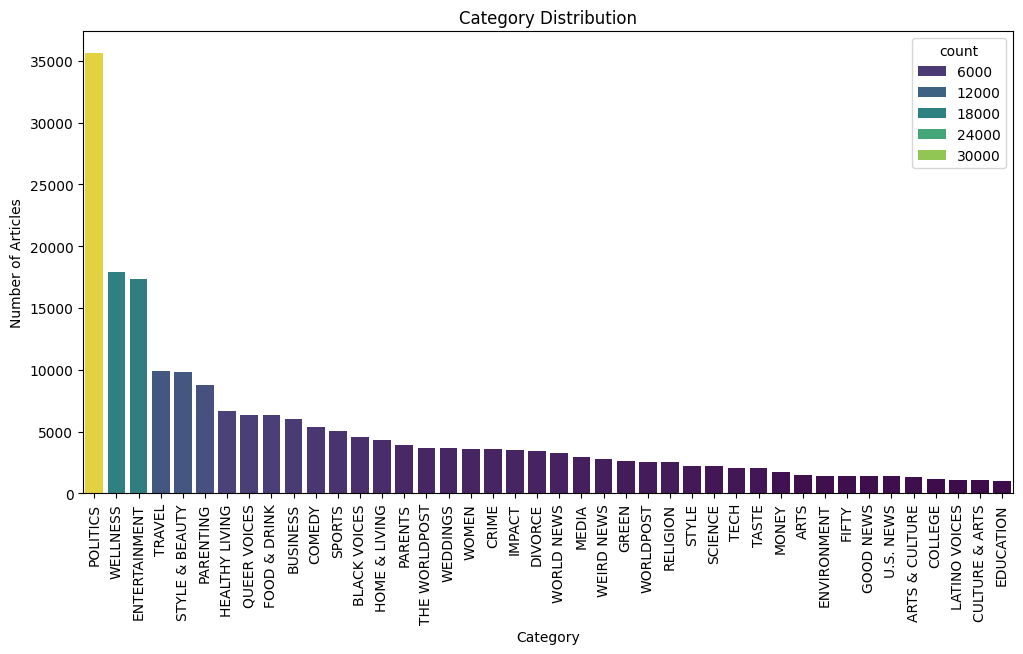

In [153]:
#Class Distribution
eda.plot_class_distribution()

Results

Data is highly imbalanced with a few dominant categories like "POLITICS" and moderately sized categories like "WELLNESS" and "ENTERTAINMENT". The majority of the other categories have much fewer samples, ranging between 1000–5000.

Impact om model:
- Overrepresentation of Dominant Categories
- Underrepresentation of Rare Categories
- Skewed Metrics

Also, from the chart, it's evident that there are some categories with overlapping or related themes that can be merged

Merging Categories Using Similarity

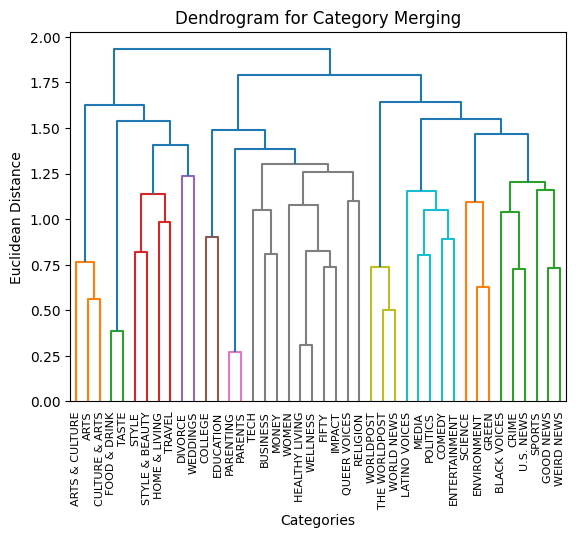

In [306]:
eda.categories_clusters()

Results

- From the dendogram we see, that some categories are very similar or almost the same - we can merge them also to solve partitially problem with imbalance.

WORLDPOST and THE WORLDPOST → Merge into WORLD NEWS

CULTURE & ARTS, ARTS & CULTURE, and ARTS → Merge into ARTS & CULTURE

and etc.


In [307]:
replacements = {'WORLDPOST': 'WORLD NEWS',
                'THE WORLDPOST': 'WORLD NEWS',
                'COMEDY': 'ENTERTAINMENT',
                'PARENTS': 'PARENTING',
                'HEALTHY LIVING': 'WELLNESS',
                'GREEN': 'ENVIRONMENT',
                'ARTS & CULTURE': 'CULTURE & ARTS',
                'ARTS': 'CULTURE & ARTS',
                'TASTE': 'FOOD & DRINK',
                'STYLE': 'STYLE & BEAUTY'
                }
data.replace(replacements, inplace = True)

We have 32 unique category - will be difficult to analyse all of them for the most common words in each category separatly.

For the further analysis, will create bigger categories, aggregating our categories by sense

Most Common Words in News: [('trump', 15463), ('say', 5598), ('new', 5161), ('donald', 4934), ('president', 4727), ('people', 4307), ('said', 4197), ('state', 4132), ('one', 4128), ('year', 3752)]


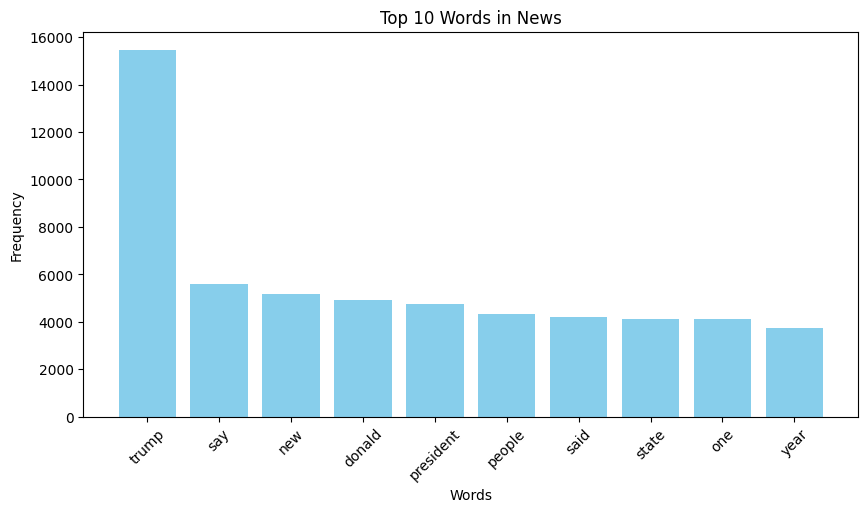

Most Common Words in Entertainment & Culture: [('photo', 6763), ('new', 6166), ('trump', 3776), ('one', 3602), ('show', 3434), ('week', 3169), ('like', 3129), ('year', 3108), ('look', 3105), ('time', 3014)]


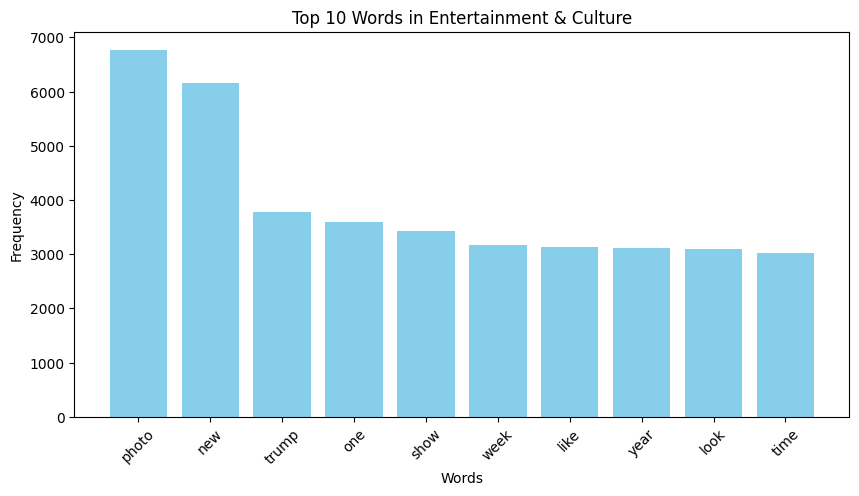

Most Common Words in Lifestyle & Wellness: [('one', 7878), ('day', 7261), ('time', 7009), ('life', 7000), ('new', 6488), ('make', 6344), ('photo', 6319), ('way', 6210), ('like', 5638), ('year', 5583)]


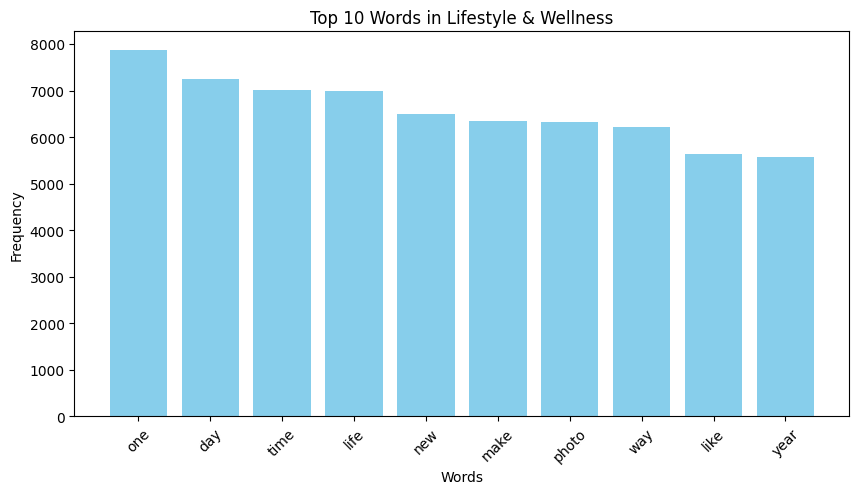

Most Common Words in Education & Careers: [('new', 1049), ('year', 955), ('business', 936), ('student', 908), ('college', 820), ('time', 818), ('one', 809), ('company', 779), ('people', 724), ('school', 721)]


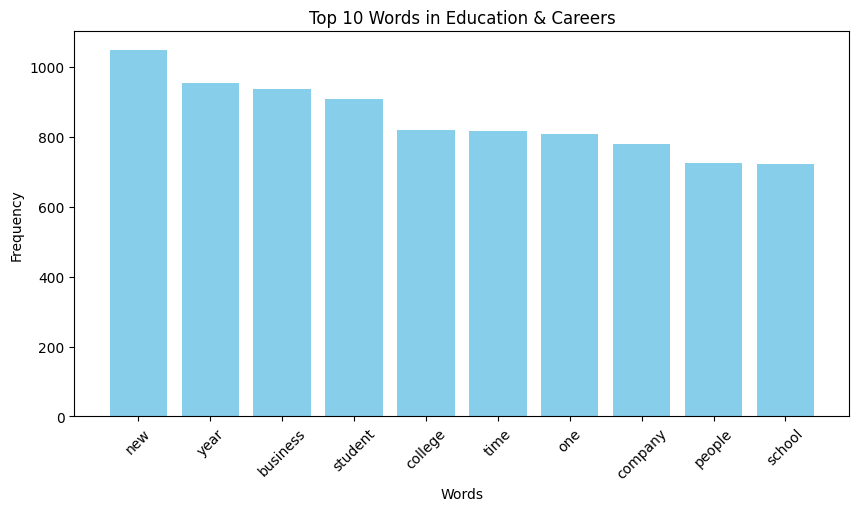

Most Common Words in Sports & Tech: [('game', 660), ('new', 635), ('player', 528), ('video', 508), ('team', 507), ('nfl', 481), ('world', 461), ('one', 419), ('apple', 418), ('first', 408)]


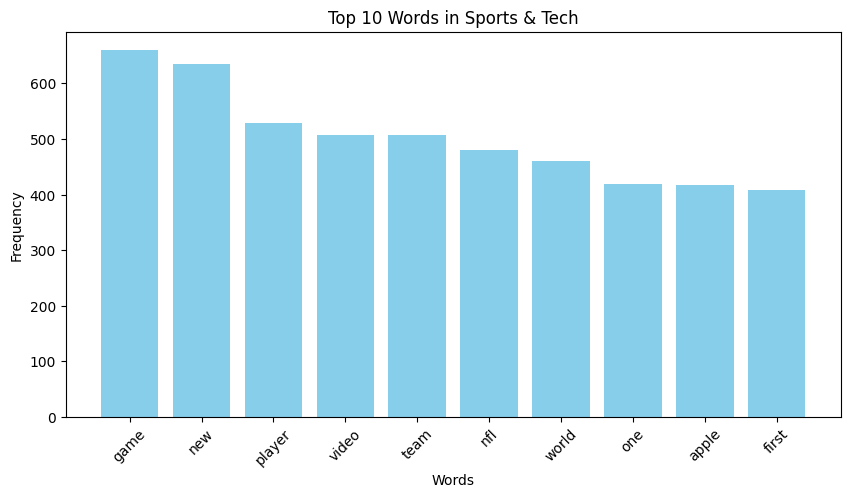

Most Common Words in Religion & Spirituality: [('pope', 359), ('church', 291), ('muslim', 266), ('christian', 251), ('people', 248), ('francis', 218), ('god', 216), ('daily', 214), ('meditation', 214), ('one', 198)]


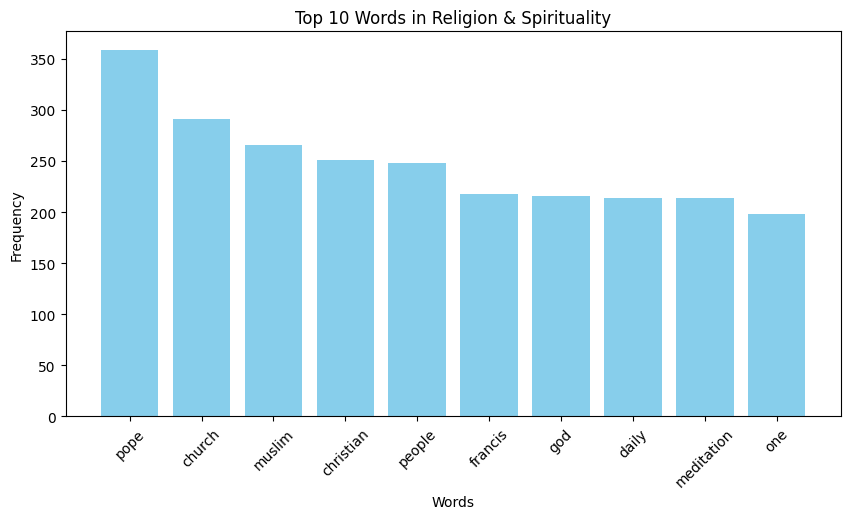

In [308]:
aggregated_categories = {
    "News": [
        "U.S. NEWS", "WORLD NEWS", "POLITICS", "CRIME", "WEIRD NEWS", 
        "ENVIRONMENT", "SCIENCE", "GOOD NEWS", "IMPACT"
    ],
    "Entertainment & Culture": [
        "ENTERTAINMENT", "CULTURE & ARTS", "MEDIA", "STYLE & BEAUTY",
        "QUEER VOICES", "BLACK VOICES", "LATINO VOICES"
    ],
    "Lifestyle & Wellness": [
        "PARENTING", "WELLNESS", "HOME & LIVING", "WOMEN", "TRAVEL", 
        "WEDDINGS", "DIVORCE", "FOOD & DRINK", "FIFTY"
    ],
    "Education & Careers": [
        "EDUCATION", "COLLEGE", "BUSINESS", "MONEY"
    ],
    "Sports & Tech": [
        "SPORTS", "TECH"
    ],
    "Religion & Spirituality": [
        "RELIGION"
    ]
}

#BOF analysis
eda.most_common_words_per_big_category(aggregated_categories)

Results

- Words like "new," "one," "time," and "year" appear frequently in many categories, reducing their utility for classification.

- Overlap between certain categories, such as "News" and "Entertainment & Culture" or "Lifestyle & Wellness", may lead to misclassification if preprocessing doesn't adequately address context.

Text Preprocessing highlights:

- Words like "one," "time," and "year" are less informative and should be filtered out during preprocessing

- Proper lemmatization (e.g., "said" → "say")

- Introduce bigrams or trigrams (e.g., "Donald Trump," "video game") to capture context

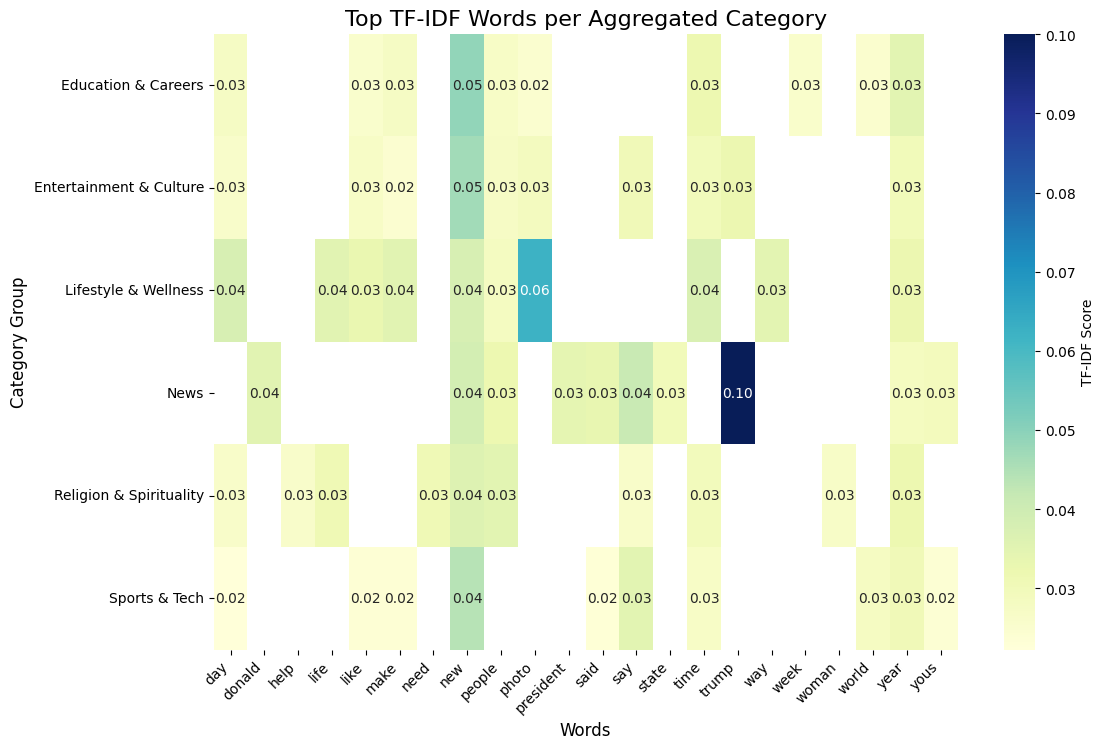

In [309]:
#tf-idf analysis
eda.words_tfidf_per_big_category(category_groups=aggregated_categories)

Results

- Some words (e.g., "time," "new," "photo," "year") frequently occur across multiple categories (Overlap in content)

- Specific categories have domain-specific words:

"Education & Careers": "student," "school," "college"

"Religion & Spirituality": "pope," "church," "god"

"Sports & Tech": "game," "team," "video," "player"

- Need further text processing (custom stop word list) & lemmatization

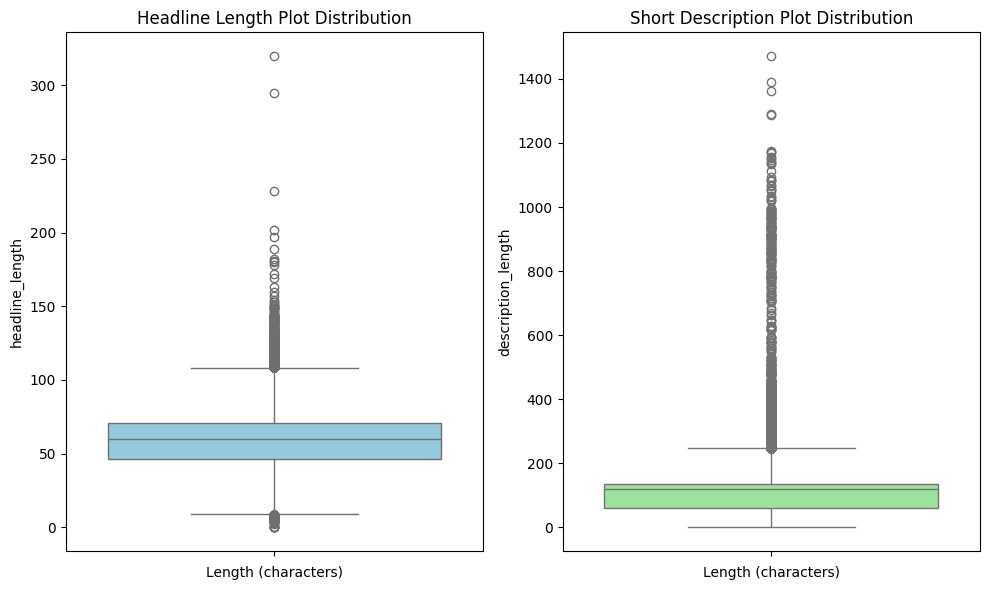

Number of short headlines (<5 chars): 58
Number of long headlines (>110 chars): 714
Number of short descriptions (<=10 chars): 21249
Number of long descriptions (>300 chars): 3581


In [282]:
short_headlines, long_headlines, short_descriptions, long_descriptions = eda.analyze_length_outliers()

Results

1. Headline Length Distribution

- Most headlines have lengths between 30 and 60 characters
- A small number of headlines are extremely short (<10 characters) or very long (>150 characters)
- The median length of headlines is above 50 characters
2. Short Description Length Distribution

- Most descriptions are between 50 and 200 characters, with a significant number of outliers extending to 600+ characters
- A few descriptions are extremely long (>1200 characters), but they appear to be rare
- Short descriptions have a much larger variability compared to headlines

3. General Observations

- Extremely short entries might not provide enough information for meaningful analysis or modeling
- Extremely long entries might introduce noise

Closer Look to outliers

In [284]:
short_headlines.head()

,link,headline,category,short_description,authors,date,processed_text,category_group,headline_length,description_length
51594,https://www.huffingtonpost.com/entry/day-1_us_...,Day 1,BLACK VOICES,"Everyone who called, sent texts, posted words ...","Sarah Abdullah, ContributorMPH Student and wan...",2016-11-10,day 1 everyone called sent text posted word en...,Entertainment & Culture,5,121
54742,https://www.huffingtonpost.com/entry/iraq-call...,Iraq,WORLD NEWS,Turkish troops were deployed on Iraqi soil to ...,,2016-10-06,iraq turkish troop deployed iraqi soil combat ...,News,4,63
78478,https://www.huffingtonpost.com/entry/hugs_b_89...,Hugs,ENTERTAINMENT,,"Marcia Liss, Contributor(Almost) Famous Cartoo...",2016-01-10,hug,Entertainment & Culture,4,0
86505,https://www.huffingtonpost.com/entry/the-ideal...,Once.,ENTERTAINMENT,,"Marcia Liss, Contributor(Almost) Famous Cartoo...",2015-10-11,,Entertainment & Culture,5,0
87234,https://www.huffingtonpost.com/entry/jete_b_82...,Jeté,POLITICS,"""...and I sail off to thunderous applause""","Jonathan Richards, ContributorCartoonist",2015-10-03,jeté sail thunderous applause,News,4,42


1. short_headlines

Short headlines are uninformative, 
but we can use them if they have length more than 0 and have description higher than threshold

2. Long headlines 

Contain a lot of noise - we will drop them

In [288]:
short_descriptions.head()

,link,headline,category,short_description,authors,date,processed_text,category_group,headline_length,description_length
4474,https://www.huffpost.com/entry/glenn-grothman-...,Wisconsin Congressman Has Coughing Fit At Mask...,POLITICS,Uh-oh.,Mary Papenfuss,2020-07-12,wisconsin congressman coughing fit maskoptiona...,News,76,6
5978,https://www.huffpost.com/entry/schitts-creek-s...,First Impressions Of The New 'Schitt's Creek' ...,HOME & LIVING,It's back.,Todd Van Luling,2019-10-14,first impression new schitts creek season netf...,Lifestyle & Wellness,63,10
6191,https://www.huffpost.com/entry/trump-ninth-ala...,Trump Just Fired Off A 9th Alabama Tweet And T...,U.S. NEWS,LET IT GO!,Josephine Harvey,2019-09-06,trump fired 9th alabama tweet twitter eating a...,News,72,10
7998,https://www.huffpost.com/entry/kanye-west-ipho...,What Is Kanye West's iPhone Password?,POLITICS,😱😱😱😱😱😱,Andy Campbell,2018-10-11,kanye west iphone password 😱😱😱😱😱😱,News,37,6
8815,https://www.huffingtonpost.com/entry/pregnant-...,Rescue Cat Has Hilarious Wide-Eyed Expression ...,WEIRD NEWS,😻😻😻,Lee Moran,2018-05-24,rescue cat hilarious wideeyed expression scan ...,News,81,3


In [287]:
data.loc[data['description_length'] < 1].count()

link                  19712
headline              19712
category              19712
short_description     19712
authors               19712
date                  19712
processed_text        19712
category_group        19712
headline_length       19712
description_length    19712
dtype: int64

1. Short short descriptions

- Data have 19712 rows without any short descriptions(they have not also been identified as NaN)

We will add this information to our data as 'No description'

- In some descriptions we have emojies

We will need to transform this emojies during preprocessing

2. Long Short Descriptions

Contain a lot of noise - drop them

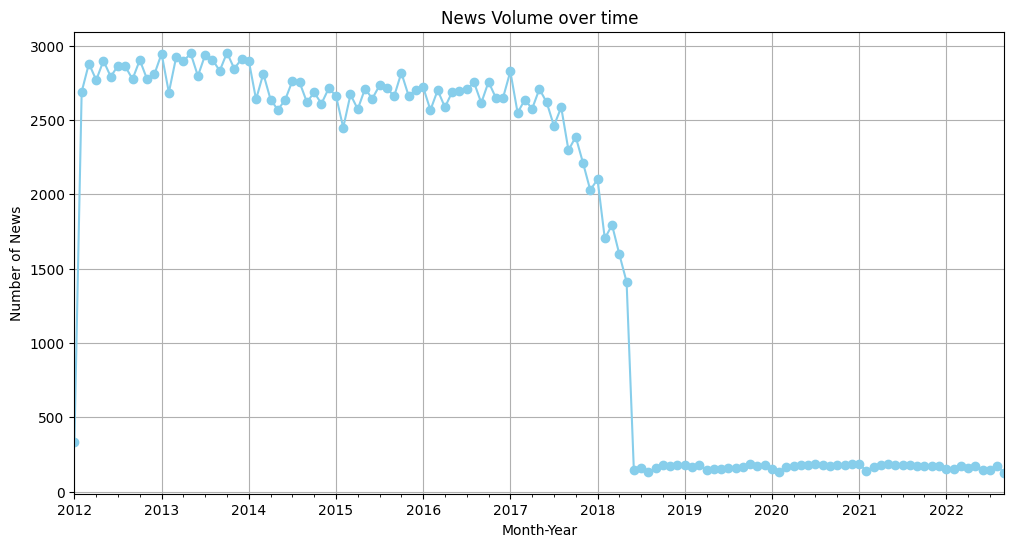

<Figure size 1400x800 with 0 Axes>

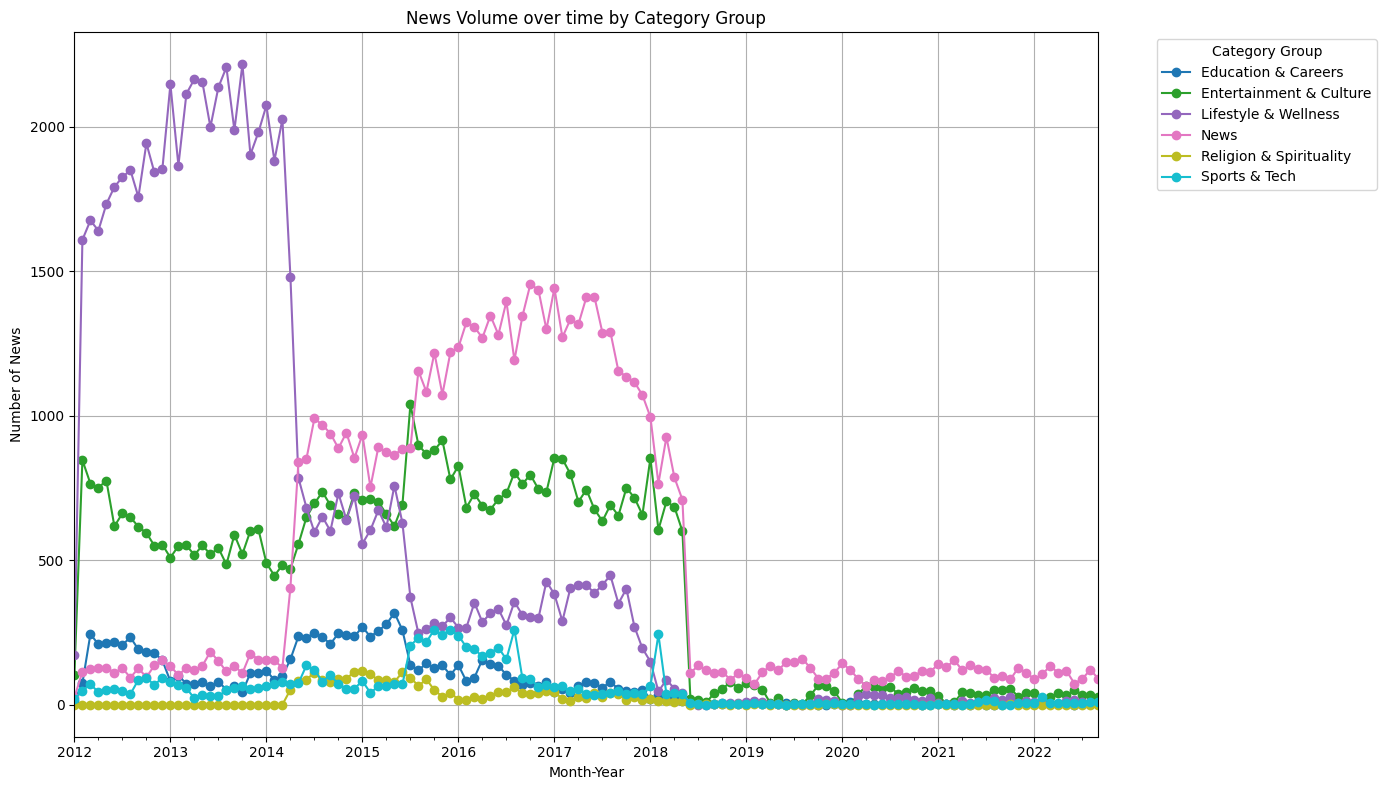

In [329]:
eda.analyze_date_trends()

Results

1. Highly Variable Trends

Some categories (e.g., Lifestyle & Wellness and News) exhibit sharp increases and decreases in volume over time

2. Underrepresented Categories

Categories like Religion & Spirituality and Sports & Tech have consistently low article volumes

3. Shifts in Focus

The rise and fall in article volumes suggest temporal shifts in focus for different categories

*For example, rise in News category during 2015-2018 may indicate global events in the world, and as a result focus shift from other categories during this period

4. Time dependence

The data is time-sensitive, using time-based train-test splits might better evaluate the model's performance

5. Time dependence for overall data

As seen from the 1st graph, after 2018 year there is sudden decline in article volume. This is due to the data collection (HuffPost stopped maintaining an extensive archive of news articles)

Reasonable to assign higher weights to the 2018-2022 articles during model training to balance their reduced volume.